In [11]:
import numpy as np

def fastprimes(n):
    primes = np.ones((n+1,), dtype=bool)
    primes[:2] = False
    
    N_MAX = int(np.sqrt(len(primes)))
    
    for candidate in range(2,N_MAX+1):
        primes[candidate*candidate::candidate] = False
        
    return np.where(primes == True)[0]

In [12]:
!javac *.java
java_classes = !ls *.class

In [13]:
import re



f = open("ranges.txt","r")

tmpfilename = "pipe.txt"


tests = int(f.readline())

"""Read all contents of file in one go, split into lines and convert each line to an integer."""
limits = map(int,f.read().splitlines())

timestats = [[0 for x in range(len(limits))] for x in range(len(java_classes))]
for fileindex,filename in enumerate(java_classes):
    f.seek(0)
    classname = filename.replace(".class","")
    
    print("Now running "+classname)
    for limitindex,limit in enumerate(limits):
        
        trueprimes = fastprimes(limit)
        count = trueprimes.size
        
        t = open(tmpfilename,"w")
        """Set number of test cases to 1."""
        """Write out the upper limit for this test case."""
        t.write(str(1)+'\n'+str(limit))
        t.close()
        
        
        output = !java {classname} < {tmpfilename}

        testprimes  = map(int,output[0:count])
        
        statsline = len(output)-1
        while output[statsline].strip() == "":
            statsline -= 1
        
        statsline = output[statsline]
        
        if(np.all(trueprimes != testprimes)):
            raise Exception("Incorrect output for "+filename+'.java .'+'Desired number of primes:'+str(limit))
        
        millis = re.findall("\d+",statsline)[1]
        timestats[fileindex][limitindex] = int(millis)
        
        print(statsline)
        
    print("\n")
    
t.close()
f.close()

Now running FastPrimeSieve
4 primes generated in 0ms.
25 primes generated in 0ms.
168 primes generated in 0ms.
1229 primes generated in 2ms.
9592 primes generated in 7ms.
78498 primes generated in 16ms.
664579 primes generated in 127ms.


Now running PrimeSieve
4 primes generated in 1ms.
25 primes generated in 0ms.
168 primes generated in 3ms.
1229 primes generated in 15ms.
9592 primes generated in 25ms.
78498 primes generated in 149ms.
664579 primes generated in 2453ms.


Now running TrialDivisionPrime
4 primes generated in 0ms.
25 primes generated in 1ms.
168 primes generated in 1ms.
1229 primes generated in 2ms.
9592 primes generated in 15ms.
78498 primes generated in 254ms.
664579 primes generated in 6423ms.




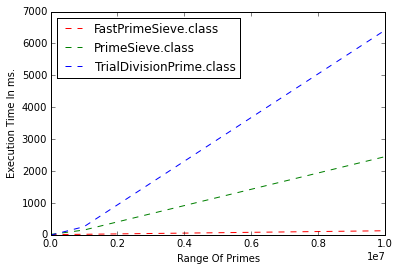

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(limits,timestats[0],'r--')
plt.plot(limits,timestats[1],'g--')
plt.plot(limits,timestats[2],'b--')
plt.xlabel("Range Of Primes")
plt.ylabel("Execution Time In ms.")
plt.legend(java_classes,loc="upper left")
plt.show()
